In [9]:
import io
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import optimize

In [10]:
data = pd.read_fwf(io.StringIO("""396.6   1055.3
409.4   1079.2
418.3   1103.7
432.1   1129.2
439.4   1157.0
453.2   1180.9
466.0   1204.8
478.2   1229.8
489.3   1251.4
501.6   1277.0
512.7   1303.6
527.7   1328.1
538.8   1354.7
552.1   1378.1
563.2   1404.7
573.2   1424.2
590.4   1450.3
605.4   1478.6
627.7   1515.3
638.8   1536.9
654.3   1563.6
668.2   1587.5
680.4   1610.8
696.0   1636.9
711.0   1659.7
724.3   1681.9
739.9   1706.3
754.8   1728.6
769.3   1752.4
784.3   1775.2
798.7   1798.0
814.8   1819.6
828.2   1842.4
844.8   1862.4
862.6   1885.7
878.2   1908.5
892.0   1930.2
910.9   1953.0
927.6   1973.0
943.1   1996.3
959.8   2016.3
976.5   2036.3
995.9   2057.9
1012.0   2077.4
1029.2   2095.7
1045.3   2115.7
1067.6   2140.7
1088.7   2160.7
1106.4   2181.3
1126.4   2201.8
1149.2   2222.4
1165.3   2239.0
1187.0   2257.3
1204.8   2272.9
1227.0   2290.7
1247.0   2310.7
1270.9   2327.3
1286.4   2340.7
1305.8   2357.3
1329.7   2375.1
1353.6   2394.0
1379.7   2410.7
1398.1   2421.8
1420.3   2435.1
1442.5   2448.4
1466.9   2463.4
1488.6   2475.6
1513.0   2488.4
1537.5   2501.8
1553.6   2510.1
1578.6   2519.5
1606.9   2533.4
1630.8   2544.0
1658.0   2554.5
1680.2   2562.3
1709.1   2574.0
1740.2   2581.7
1766.9   2590.6
1794.6   2596.2
1819.6   2601.7
1844.6   2608.4
1873.0   2611.2
1901.3   2615.1
1925.7   2617.9
1954.1   2620.6
1982.4   2622.9
2006.3   2623.4
2036.8   2624.0
2061.3   2623.4
2086.8   2620.6
2117.4   2620.1
2141.2   2617.3
2167.9   2612.3
2194.6   2609.0
2221.2   2604.0
2250.1   2599.5
2276.8   2594.5
2301.2   2587.3
2333.4   2577.3
2371.2   2565.7
2399.5   2554.6
2422.3   2547.9
2447.8   2539.0
2474.5   2527.9
2497.8   2515.1
2522.8   2504.6
2548.9   2494.0
2573.4   2483.5
2593.9   2467.9
2620.0   2452.9
2647.2   2434.6
2671.1   2419.6
2688.9   2406.3
2710.0   2390.7
2734.4   2377.9
2755.6   2357.9
2777.2   2341.8
2800.5   2323.5
2822.8   2308.5
2844.4   2288.5
2866.6   2269.6
2886.6   2253.0
2908.9   2232.4
2930.5   2212.4
2950.0   2189.7
2969.4   2173.0
2989.4   2154.1
3004.4   2134.7
3023.8   2114.7
3043.3   2093.0
3059.4   2072.5
3076.6   2051.9
3093.8   2033.0
3111.0   2011.9
3128.8   1991.9
3146.0   1968.0
3166.6   1945.8
3182.7   1923.6
3197.1   1903.6
3219.3   1873.6
3239.9   1847.0
3255.5   1823.6
3272.7   1798.1
3291.0   1775.9
3303.2   1750.9
3320.4   1728.1
3334.3   1707.0
3350.4   1683.1
3366.5   1658.7
3378.2   1637.0
3394.3   1612.0
3406.0   1589.2
3420.4   1565.4
3433.2   1541.5
3448.2   1520.9
3462.1   1493.7
3476.0   1469.3
3490.4   1445.9
3505.4   1419.3
3514.3   1397.1
3529.3   1370.4
3541.5   1349.8
3555.4   1321.5
3566.5   1299.3
3578.2   1277.6
3591.5   1254.3
3607.0   1223.2
3617.0   1198.8
3630.4   1172.7
3643.2   1146.6
3654.3   1121.0
3663.1   1098.2
3674.3   1074.3
3687.6   1051.0"""), header=None, names=["x0", "y"])

In [11]:
data["sy"] = 4.75

In [12]:
data

,x0,y,sy
0,396.6,1055.3,4.75
1,409.4,1079.2,4.75
2,418.3,1103.7,4.75
3,432.1,1129.2,4.75
4,439.4,1157.0,4.75
...,...,...,...
169,3643.2,1146.6,4.75
170,3654.3,1121.0,4.75
171,3663.1,1098.2,4.75
172,3674.3,1074.3,4.75


In [13]:
def cat(x, a, c, x0):
    return c - a * np.cosh((x - x0) / a)

In [14]:
k = 2000
data /= k

In [15]:
data

,x0,y,sy
0,0.19830,0.52765,0.002375
1,0.20470,0.53960,0.002375
2,0.20915,0.55185,0.002375
3,0.21605,0.56460,0.002375
4,0.21970,0.57850,0.002375
...,...,...,...
169,1.82160,0.57330,0.002375
170,1.82715,0.56050,0.002375
171,1.83155,0.54910,0.002375
172,1.83715,0.53715,0.002375


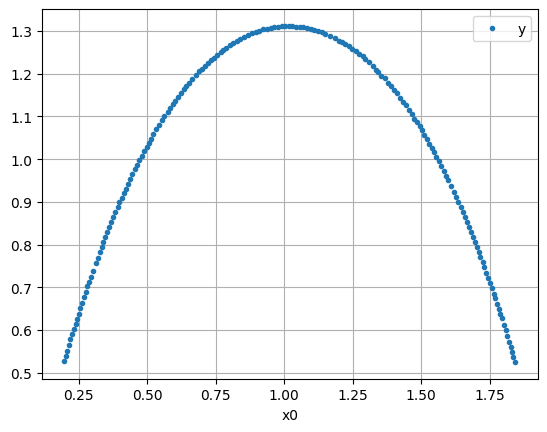

In [22]:
axe = data.plot(x="x0", y="y", linestyle="none", marker=".")
axe.grid()

https://stackoverflow.com/questions/77455295/curve-fit-with-a-catenary-returns-huge-pars-for-no-apparent-reason/77468667#77468667

In [16]:
popt, pcov = optimize.curve_fit(
    cat, data.x0.values, data.y.values, sigma=data.sy.values, absolute_sigma=True#, p0=(1000., 3000., 2000.)
)

In [17]:
popt, pcov

(array([0.52514911, 1.83463895, 1.01891444]),
 array([[ 7.93071474e-08,  1.99806113e-08, -5.84150321e-10],
        [ 1.99806113e-08,  3.74513037e-08, -1.32687392e-10],
        [-5.84150321e-10, -1.32687392e-10,  1.85414148e-08]]))

In [18]:
popt * k

array([1050.29821688, 3669.27789367, 2037.82887592])

In [ ]:
from scifit.solvers import FitSolver1D

In [66]:
class Catenoid(FitSolver1D):
    @staticmethod
    def model(x, a, b, c, d):
        return a + b * np.cosh((x[:,0] - c) / d)    

In [67]:
model = Catenoid()
sol = model.fit(data, p0 = (1000, 3000, 2000, -1000))

<Axes: title={'center': 'Fit Plot: \nn=174, $R^2$=1.000, $\\chi^2_r$=100.959, $P(\\chi^2_{170} \\geq 0.594 \\,|\\, H_0) = 1.0000$\n$\\beta \\pm s_{\\beta}$ = (3.89e+03 ± 27.3; -1.26e+03 ± 26.8; 2.04e+03 ± 0.275; -1.14e+03 ± 10.4)'}, xlabel='Feature, $x_1$', ylabel='Target, $y$'>

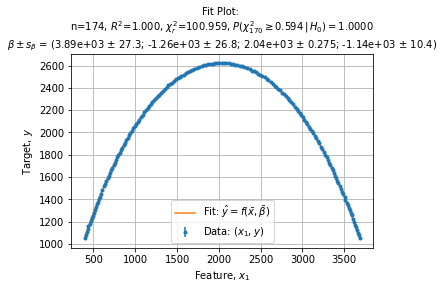

In [68]:
model.plot_fit()

<Axes: title={'center': 'Fit $\\chi^2$ Plot: \nn=174, $R^2$=1.000, $\\chi^2_r$=100.959, $P(\\chi^2_{170} \\geq 0.594 \\,|\\, H_0) = 1.0000$\n$\\beta \\pm s_{\\beta}$ = (3.89e+03 ± 27.3; -1.26e+03 ± 26.8; 2.04e+03 ± 0.275; -1.14e+03 ± 10.4)'}, xlabel='Random Variable, $\\chi^2$', ylabel='Density, $f(\\chi^2)$'>

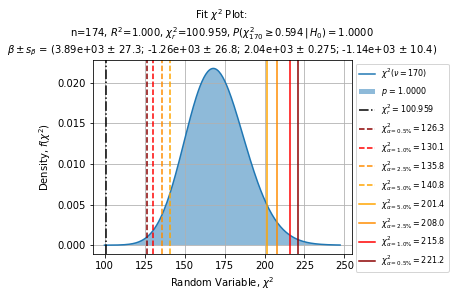

In [69]:
model.plot_chi_square()

array([[<Axes: ylabel='$\\beta_{2}$'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='$\\beta_{3}$'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='$\\beta_{1}$', ylabel='$\\beta_{4}$'>,
        <Axes: xlabel='$\\beta_{2}$'>, <Axes: xlabel='$\\beta_{3}$'>]],
      dtype=object)

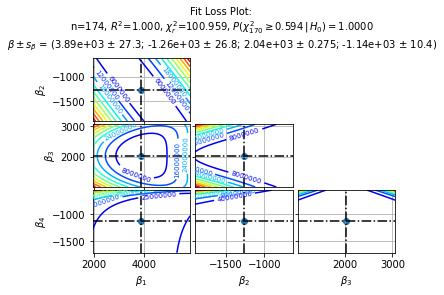

In [70]:
model.plot_loss()